In [48]:
import pandas as pd 
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.io.json import json_normalize 
import json
import seaborn as sns

mpl.style.use('ggplot')

In [4]:
train = pd.read_csv('./data/train.csv',engine ='python', error_bad_lines=False ,parse_dates=['date'],warn_bad_lines =False)


In [5]:
train.columns

Index(['channelGrouping', 'date', 'device', 'fullVisitorId', 'geoNetwork',
       'sessionId', 'socialEngagementType', 'totals', 'trafficSource',
       'visitId', 'visitNumber', 'visitStartTime'],
      dtype='object')

In [6]:
grp_1= train[['fullVisitorId','totals','date']].copy()

In [7]:
grp_1.dtypes

fullVisitorId            object
totals                   object
date             datetime64[ns]
dtype: object

In [8]:
d_t= pd.io.json.json_normalize(grp_1.totals.apply(json.loads))


In [9]:
grp_1=grp_1.join(d_t.apply(pd.Series))

In [10]:
grp_1.head()

,fullVisitorId,totals,date,bounces,hits,newVisits,pageviews,transactionRevenue,visits
0,1131660440785968503,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...",2016-09-02,1,1,1,1,NaN,1
1,377306020877927890,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...",2016-09-02,1,1,1,1,NaN,1
2,3895546263509774583,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...",2016-09-02,1,1,1,1,NaN,1
3,4763447161404445595,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...",2016-09-02,1,1,1,1,NaN,1
4,27294437909732085,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...",2016-09-02,1,1,NaN,1,NaN,1


In [11]:
del grp_1['totals']

In [12]:
grp_1.head()

,fullVisitorId,date,bounces,hits,newVisits,pageviews,transactionRevenue,visits
0,1131660440785968503,2016-09-02,1,1,1,1,NaN,1
1,377306020877927890,2016-09-02,1,1,1,1,NaN,1
2,3895546263509774583,2016-09-02,1,1,1,1,NaN,1
3,4763447161404445595,2016-09-02,1,1,1,1,NaN,1
4,27294437909732085,2016-09-02,1,1,NaN,1,NaN,1


In [13]:
grp_1.set_index('fullVisitorId',inplace=True)

In [14]:
grp_1['transactionRevenue'].notnull().sum()

5383

In [15]:
grp_1.sort_values(['transactionRevenue'], ascending=False, axis=0, inplace=True)


In [16]:
grp_1.head()

,date,bounces,hits,newVisits,pageviews,transactionRevenue,visits
fullVisitorId,,,,,,,
4807533112045033919,2016-11-22,NaN,14,1,11,99990000,1
9594790927947588163,2016-11-12,NaN,61,NaN,44,99990000,1
2581268341916303872,2017-05-25,NaN,24,1,18,99990000,1
9830452655516409751,2016-10-26,NaN,25,1,22,99990000,1
938988824374966310,2017-03-21,NaN,19,NaN,17,99990000,1


In [17]:
date=['2016-11-22','2016-11-12','2017-05-25','2017-03-21']

In [18]:
# grp_1= grp_1['visits'].transpose()
# # df_top5 = df_top5[years].transpose() 


In [19]:
grp_1.head()

,date,bounces,hits,newVisits,pageviews,transactionRevenue,visits
fullVisitorId,,,,,,,
4807533112045033919,2016-11-22,NaN,14,1,11,99990000,1
9594790927947588163,2016-11-12,NaN,61,NaN,44,99990000,1
2581268341916303872,2017-05-25,NaN,24,1,18,99990000,1
9830452655516409751,2016-10-26,NaN,25,1,22,99990000,1
938988824374966310,2017-03-21,NaN,19,NaN,17,99990000,1


In [20]:
# del grp_1['date']
# del grp_1['bounces']
# del grp_1['hits']
# del grp_1['newVisits']
# del grp_1['pageviews']

# del grp_1['visits']



In [21]:
grp_1.dtypes

date                  datetime64[ns]
bounces                       object
hits                          object
newVisits                     object
pageviews                     object
transactionRevenue            object
visits                        object
dtype: object

In [22]:
grp_1['transactionRevenue']=grp_1['transactionRevenue'].astype(float)    

In [23]:
grp_1=grp_1.fillna(0)

In [24]:
# grp_1.plot()

In [25]:
daily_revenue_df =grp_1.groupby(by=["date"],axis = 0 ).sum()
daily_revenue_df.head()

,transactionRevenue
date,
2016-08-03,0.000000e+00
2016-08-05,5.594260e+09
2016-08-09,5.596400e+09
2016-08-11,7.427120e+09
2016-08-13,2.198710e+09


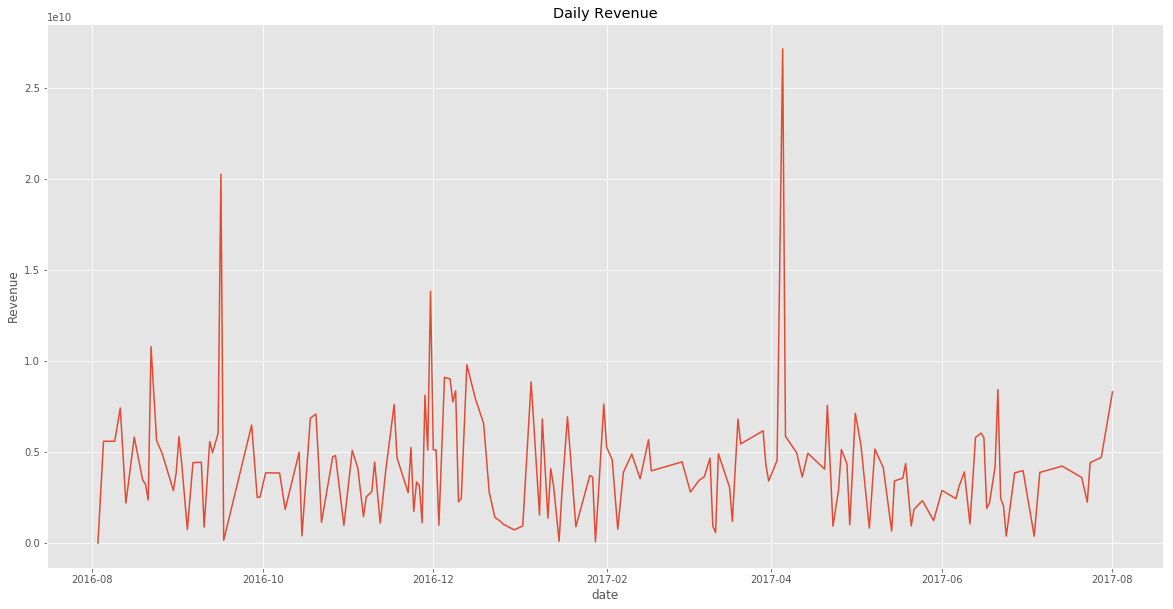

In [26]:
fig, axes = plt.subplots(figsize=(20,10))
axes.set_title("Daily Revenue")
axes.set_ylabel("Revenue")
axes.set_xlabel("date")
axes.plot(daily_revenue_df["transactionRevenue"])


In [27]:
ID_revenue_df =grp_1.groupby(by=["fullVisitorId"],axis = 0 ).sum()
ID_revenue_df.head()

,transactionRevenue
fullVisitorId,
0000010278554503158,0.0
0000020424342248747,0.0
000005103959234087,0.0
0000068403966359845,0.0
0000093957001069502,0.0


In [40]:
revenue= ID_revenue_df.loc[ID_revenue_df['transactionRevenue']>0]

Text(0.5,0,'fullVisitorId')

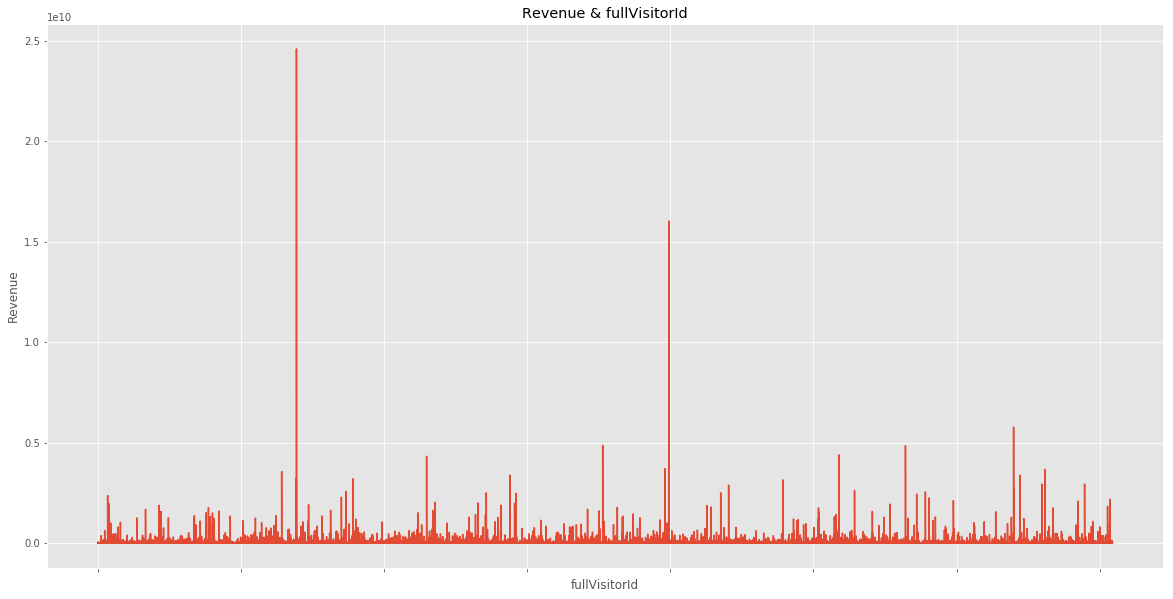

In [37]:
fig=plt.figure(figsize=(20,10))
ax= ID_revenue_df['transactionRevenue'].plot()
ax.set_title("Revenue & fullVisitorId")
ax.set_ylabel("Revenue")
ax.set_xlabel("fullVisitorId")


Text(0.5,0,'fullVisitorId')

<Figure size 1080x720 with 0 Axes>

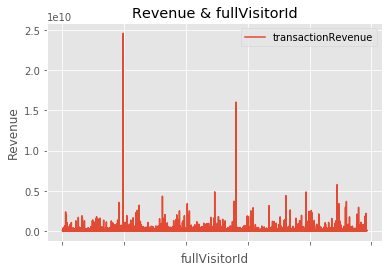

In [47]:
plt.figure(figsize=(15,10))
ax2= revenue.plot()
ax2.set_title("Revenue & fullVisitorId")
ax2.set_ylabel("Revenue")
ax2.set_xlabel("fullVisitorId")


Text(0.5,0,'fullVisitorId')

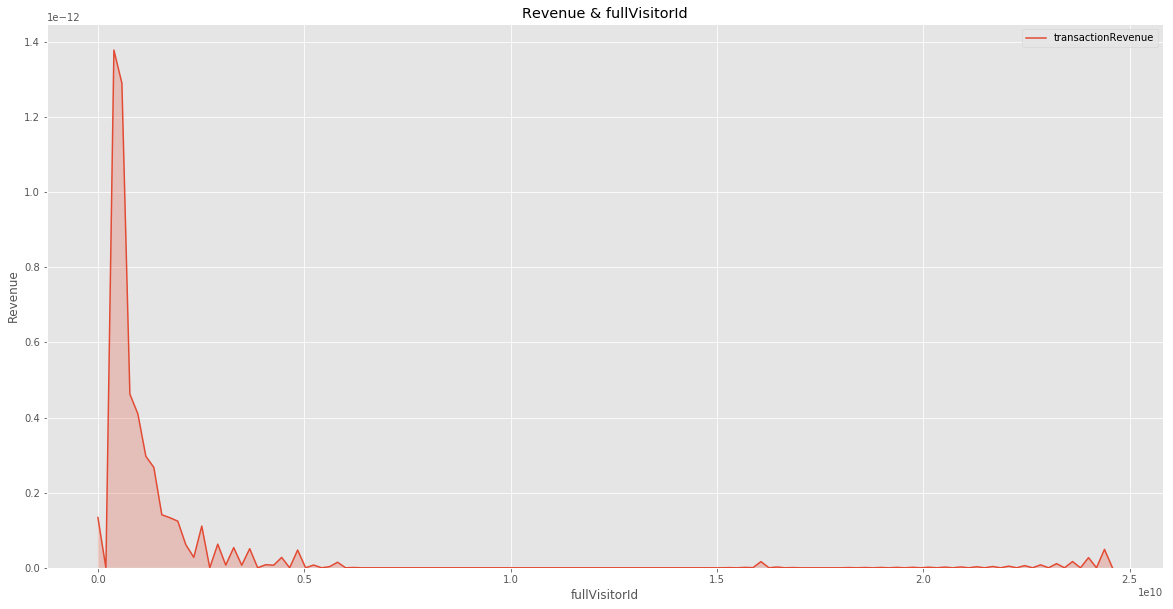

In [50]:
# log_re=np.log(ID_revenue_df['transactionRevenue']) -np.log(ID_revenue_df['transactionRevenue'].shift(1)) 
x=ID_revenue_df['transactionRevenue']
fig=plt.figure(figsize=(20,10))
ax= sns.kdeplot(x,shade=True)
ax.set_title("Revenue & fullVisitorId")
ax.set_ylabel("Revenue")
ax.set_xlabel("fullVisitorId")


Text(0.5,0,'fullVisitorId')

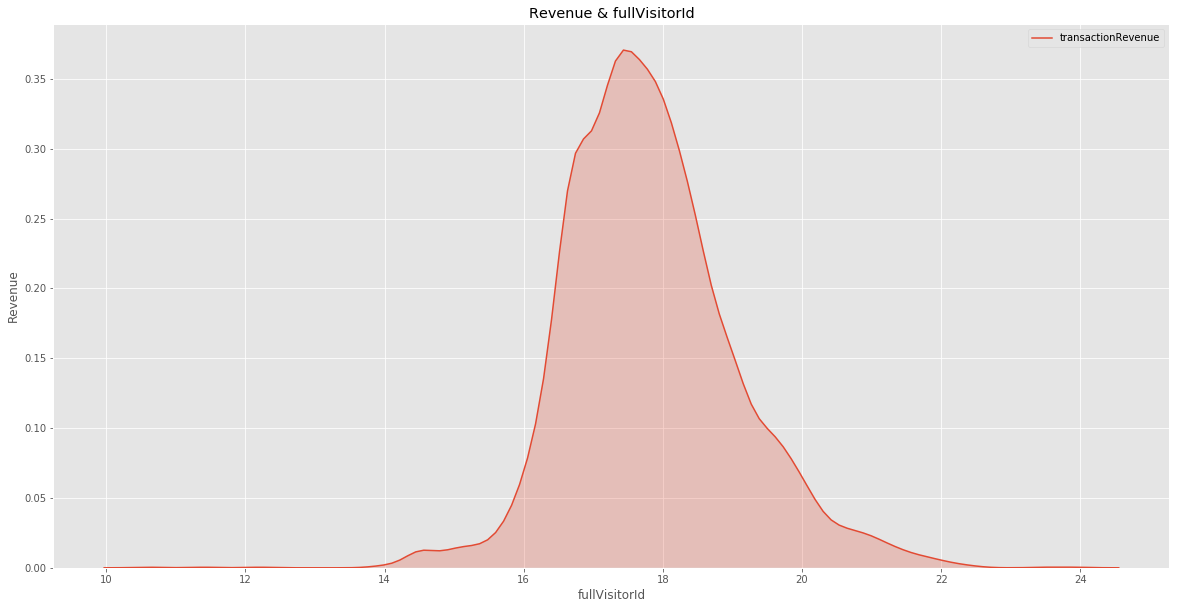

In [57]:
x_log=np.log(ID_revenue_df.loc[ID_revenue_df['transactionRevenue']>0])
fig=plt.figure(figsize=(20,10))
ax= sns.kdeplot(x_log['transactionRevenue'],shade=True)
ax.set_title("Revenue & fullVisitorId")
ax.set_ylabel("Revenue")
ax.set_xlabel("fullVisitorId")


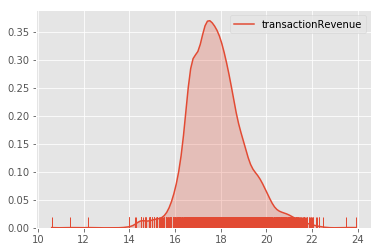

In [67]:
sns.kdeplot(x_log['transactionRevenue'], shade=True, cut=0)
sns.rugplot(x_log['transactionRevenue']);


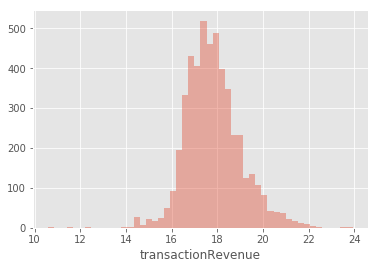

In [72]:
sns.distplot(x_log['transactionRevenue'], kde=False);
#fit attr